<h2> Questions & Description</h2>	



**Broad Question**

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

- This broad question will explore the demographic and behavioural factor (such as age, gender, experience, and engagement) and how it may influence a player's likelihood of subscribing. It looks at who the players are and how they interact and engage with the game. 

**Specific Question** 

Using measurements of a player's engagement, such as their total playtime, average playing time, and experience, is an experienced player (pro players and veteran players) more likely to subscribe to the newsletter in comparison to a beginner player?

This specific question will be addressed through predictive modeling, where the response variable is:

`subscribe` (Logical: TRUE/FALSE),

and the explanatory variables include:

`experience` (categorical: Beginner, Amateur, Regular, Pro, Veteran),

`played_hours` (numeric: total hours played),

`avg_session_duration` (numeric: average session length),

`num_sessions` (numeric: number of sessions per player),

and possibly demographic controls (Age, gender).

Some of these variables are not in the original data sets, but I detail later that I will mutate and derive them. In the section below, I explain how I plan to wrangle my data to get it into a form where I can apply my predictive method, which will be the K-Nearest Neighbours Classification model, detailed below as well. 

<h2> Data Summary Description</h2>	

The dataset consists of two files, players.csv and sessions.csv. 


<h3> players.csv File Summary </h3>	


The file "players.csv" contains demographic and behavioural information; there are seven variables that are "experience", "subscribe", "hashedEmail", "played_hours", "name", "gender", and "Age". Within this file, there are 196 observations and only the "Age" variable is missing two values. The key indentifier of each player is the "hashedEmail" variable, which is unique to each player. 

<h4>`players.csv Variables Summary </h4>	




| Variable | Type | Missing Values | Unique Values | Description / Notes |
|-----------|------|----------------|----------------|----------------------|
| `experience` | fct | 0 | 5 | Describes the gaming experience of each player. Categories/limited number of values for data include Veteran, Pro, Regular, Amateur and Beginner in order of experience. |
| `subscribe` | lgl | 0 | 2 | Logical data type that indicates whether the player subscribed to the game-related newsletter. |
| `hashedEmail` | chr | 0 | 196 | Unique anonymized player ID (key for joining with `sessions.csv`). This identifies the players and is a string of lowercase letters and numbers. |
| `played_hours` | int | 0 | 43 | Total number of hours played of each player. |
| `name` | chr | 0 | 196 | Player alias or name (not used as an analytical variable). |
| `gender` | fct | 0 | 7 | Player-reported gender (categorical). Categories of gender include: Male, Female, Agender, Non-binary, and some individuals indicated "prefer not to say". |
| `Age` | int | 2 | 32 | Player’s age  |

**Notes and Potential Issues**

- There is an uneven class distribution (where the variable of "Amateur" is the most common). When analyzing my specific question of whether experienced players would be more likely to subscribe to a newsletter than a beginner player, there would be more data on beginner players (beginners and amateurs) than the experienced players. 
- The "subscribe" variable is my response variable for the project and will determine whether or not the players are more likely
- The "played_hours" variable is heavily skewed right, with some players with over 200 hours
- There may be outliers in the age, as the range is age 9 to age 57


<h3> sessions.csv File Summary </h3>	


The file "sessions.csv" is a list of individual play sessions by each player, with detailed records of each player's gameplay. Each player  is identified by the "hashedEmail" variable, like in the "player.csv". In the file, there are 1,535 observations, 5 variables: "hashedEmail", "start_time", "end_time", "original_start_time", and "orginal_end_time". 

<h4> sessions.csv Variables Summary </h4>	



| Variable | Type | Missing Values | Unique Values | Description |
|-----------|------|----------------|----------------|----------------------|
| `hashedEmail` | chr | 0 | 125 | Player identifier for joining with `players.csv` |
| `start_time` | int | 0 | 1504 | Start time of a play session |
| `end_time` | int | 2 | 1489 | End time of a play session (missing values probably mean interrupted sessions) |
| `original_start_time` | int | 0 | 649 | Original (possibly unadjusted) session start time |
| `original_end_time` | int | 2 | 650 | Original session end time (missing for incomplete sessions) |

**Notes and Potential Issues**

- Duplicate player sessions: some people have up to 310 sessions
- Outlier: there were some sessions that were a lot longer or shorter than average
- Should convert the start time to datetime format, it is currently a string of numbers

<h3> How Data Will Be Used </h3>	


To answer the question: "Can demographic characteristics (age, gender, and experience level), and gameplay behaviour predict newsletter subscription among players?" More specifically, "Can we determine if experienced players are more likely to subscribe to a game related newsletter than beginner players?"

I will better explain the exact method of what I will do in a later section, titled "Methods and Plan". This section will explain how I will alter/merge the files to one unified dataset, and how I will mutate their columns to be used. 

1. We will merge the datasets on 'hashedEmail' to link player demographics and session data. Since the players are identified by their emails, which is the same for both datasets, I can merge the datasets using this variable. This way, we can join the datasets to get more information about each player in one, unified file about players' statistics and the aggregated session information. 
2. Next, I will wrangle the variables:
- I will replace or impute missing values in the "Age" variable with the mean or median age
- Remove or adjust sessions with missing end_time values
- Convert the timestamps in the time variables with the proper date-time format.
- I will standardize the variables by normalizing the highly skewed variables such as played_hours.
- I will also remove some of the variables and columns that are redundant. For example, the variable name and timestamps are not useful for the prediction after I calculate the summaries of each session.
3. To better capture the behavioural patterns, I will mutate and create new columsn from the sessions.csv data. I listed them below in the table with their uses:

  | Mutated Feature            | Description                          | Use                                                      |
| -------------------------- | ------------------------------------------ | ------------------------------------------------------------------- |
| **`num_sessions`**         | Count of total sessions per player         | Indicates player engagement frequency                              |
| **`avg_session_duration`** | Mean of (`end_time - start_time`)          | Measures in minutes how long players typically play per session               |
| **`total_play_time`**      | Sum of all session durations               | Proxy for total time spent in the game (may refine `played_hours`) |
| **`session_frequency`**    | `num_sessions` ÷ number of active days     | Shows consistency of daily engagement
| **`active_days`**          | Count of distinct days a player was active | Represents sustained engagement over a period of time                            |


The variables that I would keep in my merged dataset of 'players.csv' and 'sessions.csv' are: 
- `hashedEmail` = this is the key identifier that will merge the datasets. It is not a predictor but it is necessary during merging. I can drop this variable after merging to clean up the dataset and remove any extra noise.
- `subscribe` = this is the response variable for the prediction. It is a logical variable that indicates whether or not a player has subscribed to the newsletter with TRUE or FALSE
- `experience` = this is the most important categorical predictor as it displays the level that players are at, from Beginner to Veteran. This way, I can organize the players into the category of "experienced players" and "beginner players" when answering my question.
- `age` = this is a numeric predictor that may give me more insight on how it might affect other factors (such as experience or hours played) and how this could affect the likelihood of subscription. For instance, a younger, highly experienced player may engage differently from an old beginner, even if both play similar hours. Or, younger players might be more engaged or spend more time playing and older players might be more likely to subscribe if they prefer updates and reading newsletter. Although this variable does not seem that important, it can inform me and help me interpret the data. During the project, however; if I find that the age shows no correlation with subscription then I would consider removing it, or if there are too many outliers, then I will remove it.
- `gender` = I can keep this as it as a useful demographic indicator. During my process, I can better interpret the data and results with this variable, similar to age. Even if gender does not strongly predict subscription, it helps describe my sample and will help me better understand who my users are. This column notably has no missing values. However, during my project, if I find that this variable does not help me or if the gender distribition is too unbalanced, with a lot more of one gender than the other, I will remove it.
- `played_hours` = I would keep this variable as it is one of the predictor variables in this case. It is very skewed to the right, so I would try to standardize it using a log transformation first before I use" it.

The variables that I would completely remove are: 
- `name` = since I have already established that my identifier variable as the `hashedEmail`, having this would be extra and redundant
- `start_time` and `end_time` = I would need these to to calculate session duration and frequency after converting them to the date-time format. However, I would remove these shortly after as they would be redundant.
- `original_start_time` and `orginal_end_time` = I would remove this right away as they are redunant duplicates of the `start_time` and `end_time`.

After I finish cleaning and merging, I should have 196 rows (which are for all the players that my dataset will look at), and 10 variables. If needed, I can keep some temporarily and remove them if I find that they are not required. The `subscribe` variable is my response variable. 

In [1]:
library(tidyverse)
library(ggplot2)

players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

head(players)
head(sessions)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [2]:
sessions <- sessions |>
    mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"), 
           end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"))

sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


I did some basic wrangling to convert the timestamps into actual numeric date-time formats that could be recognized and calculated by R, I also computed the durations and summarized the session activity. This way, I have a better understanding of what is going on the data and I have actual numerical values of durations that can help me summarize the dataset.

In [3]:


sessions <- sessions |>
  mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

data_combined <- players |>
  left_join(sessions |> group_by(hashedEmail) |>
              summarize(avg_session_duration = mean(session_duration, na.rm = TRUE),
                        total_sessions = n()),
            by = "hashedEmail")

data_combined


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_duration,total_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,50.00000,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,9.00000,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,5.00000,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,13.00000,1


In [4]:
mean_table <- players %>%
  select(where(is.numeric)) %>%
  summarise(across(everything(), ~mean(.x, na.rm = TRUE))) %>%
  pivot_longer(cols = everything(),
               names_to = "Variable",
               values_to = "Mean_Value")

mean_table


Variable,Mean_Value
<chr>,<dbl>
played_hours,5.845918
Age,21.139175


On average, players around 21 years old have played an average of 6 hours, which suggests that there is light engagement in the players. The average age of the players shows that the primary audience is composed of adults, most likely students, which could influence engagement levels. On average, players have logged on approximately 5.8 hours of playtime, so this reinforces my interpretation that there is overall light engagement.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


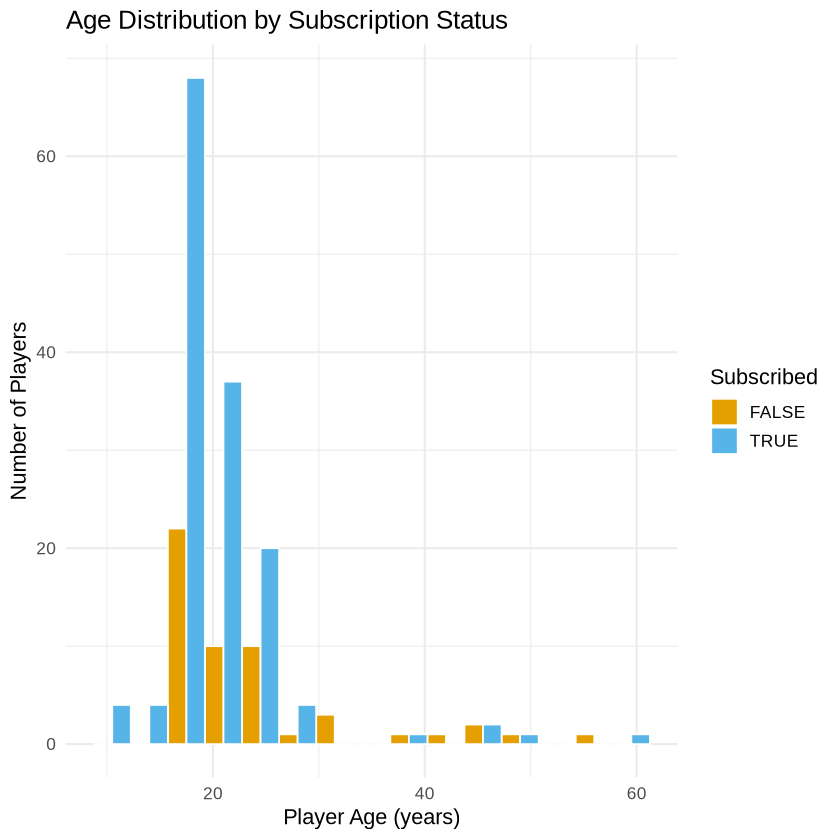

In [5]:
ggplot(players, aes(x = Age, fill = as.factor(subscribe))) +
  geom_histogram(position = "dodge", bins = 15, color = "white") +
  labs(title = "Age Distribution by Subscription Status",
       x = "Player Age (years)",
       y = "Number of Players",
       fill = "Subscribed") +
  scale_fill_manual(values = c("#E69F00", "#56B4E9")) +
  theme_minimal(base_size = 13)


The age distribution clearly demonstrates that younger players, particularly those around age 20, are significantly more likely to subscribe to the game-related newsletter, with subscribed players outnumbering non-subscribers across most age groups. Younger players are more engaged and socially connected, which would make them more receptive to newsletters offering updates.

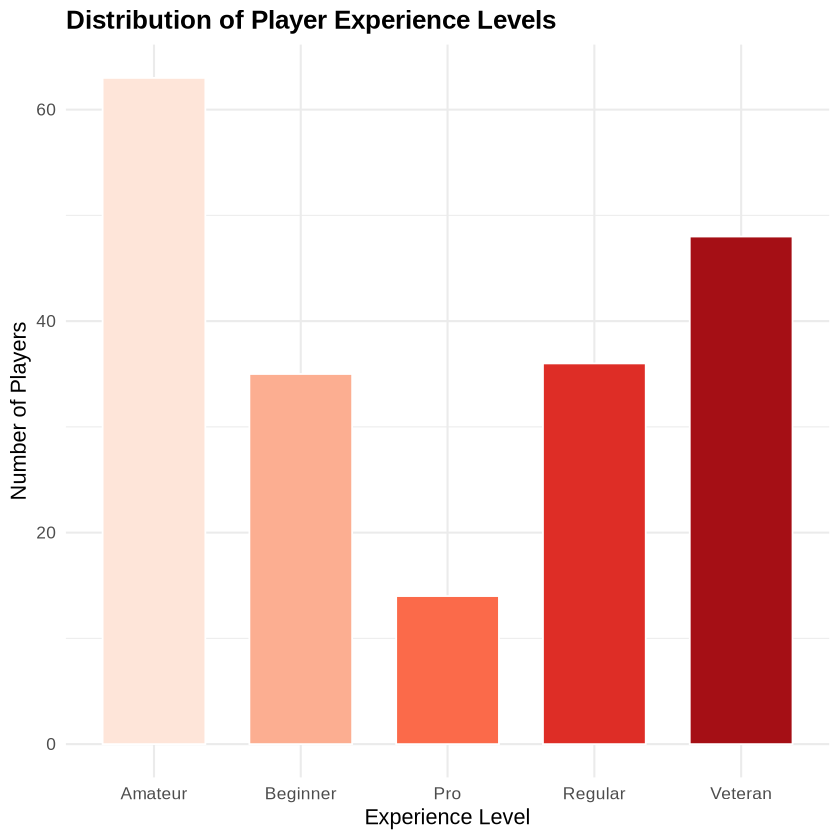

In [6]:

ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar(color = "white", width = 0.7) +
  labs(title = "Distribution of Player Experience Levels",
       x = "Experience Level",
       y = "Number of Players") +
  scale_fill_brewer(palette = "Reds") +
  theme_minimal(base_size = 13) +
  theme(legend.position = "none",
        plot.title = element_text(face = "bold"))


The distribution of the player experience levels above shows that the majority of players fall into the Amateur category, followed by Veteran, Regular, Beginner, and lastly, Pro. This explains that Pro and Veteran players are fewer in number, which means that they may represent a disproportionately high share of newsletter subscribers due to their engagement. When combined with the distribution above, which shows that younger players are more likely to subscribe and experienced players have higher playtime and session frequency, it is clear that subscription likelihood is not evenly distributed across all experience levels.

In [8]:


experience_subscribe <- players |>
  group_by(experience) |>  summarise(prop_subscribe = mean(subscribe))  

experience_subscribe

experience,prop_subscribe
<chr>,<dbl>
Amateur,0.7142857
Beginner,0.7714286
Pro,0.7142857
Regular,0.8055556
Veteran,0.6875000


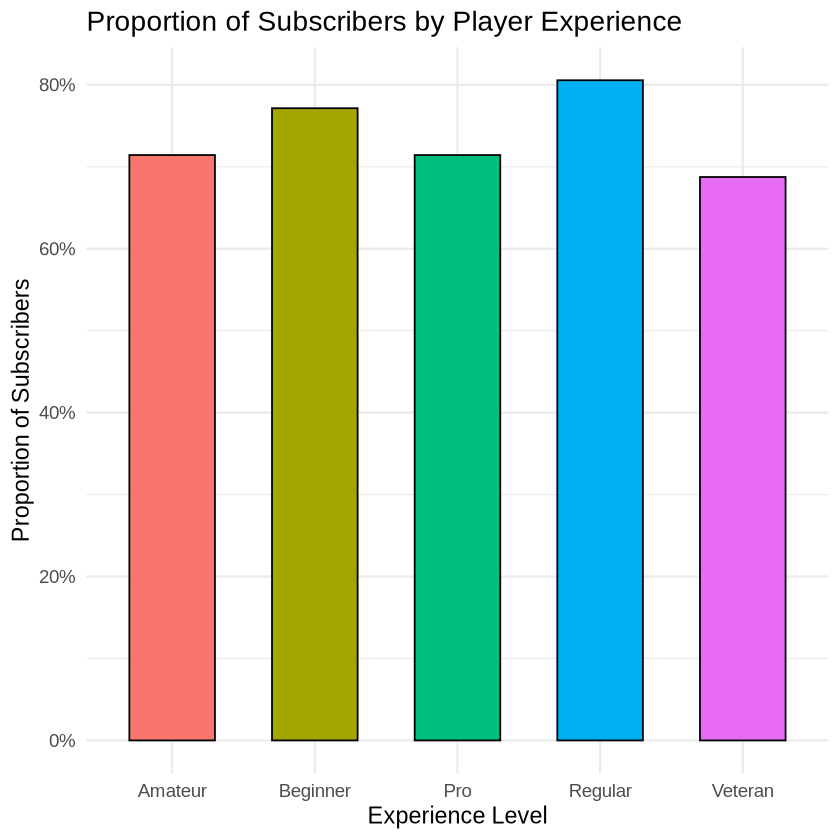

In [9]:
ggplot(experience_subscribe, aes(x = experience, y = prop_subscribe, fill = experience)) +
  geom_col(color = "black", width = 0.6) +
  labs(title = "Proportion of Subscribers by Player Experience",
       x = "Experience Level",
       y = "Proportion of Subscribers") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")


The subscription proportions across the five experience levels reveal that regular players have the highest likelihood of subscribing (80.6%) from the plot and table above, which is followed closely by the Beginners (77%), while the Veterans have the lowest subscription rate at 69%. This suggests that the moderately experienced players, like Regulars, are most engaged with the game content, most likely because they are still actively learning and exploring, which makes newsletters relevant to them. There is also a high subscription rate amongst  Beginner players, which could be because they are curious or would like guidance, while the lower rate among Veterans could indicate that they are already confident in their knowledge of the game. Pro players have similar subscription rates to Amateur players, which shows that engagement style varies between the high-experience groups, differentiating between a Pro player and a Veteran player. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


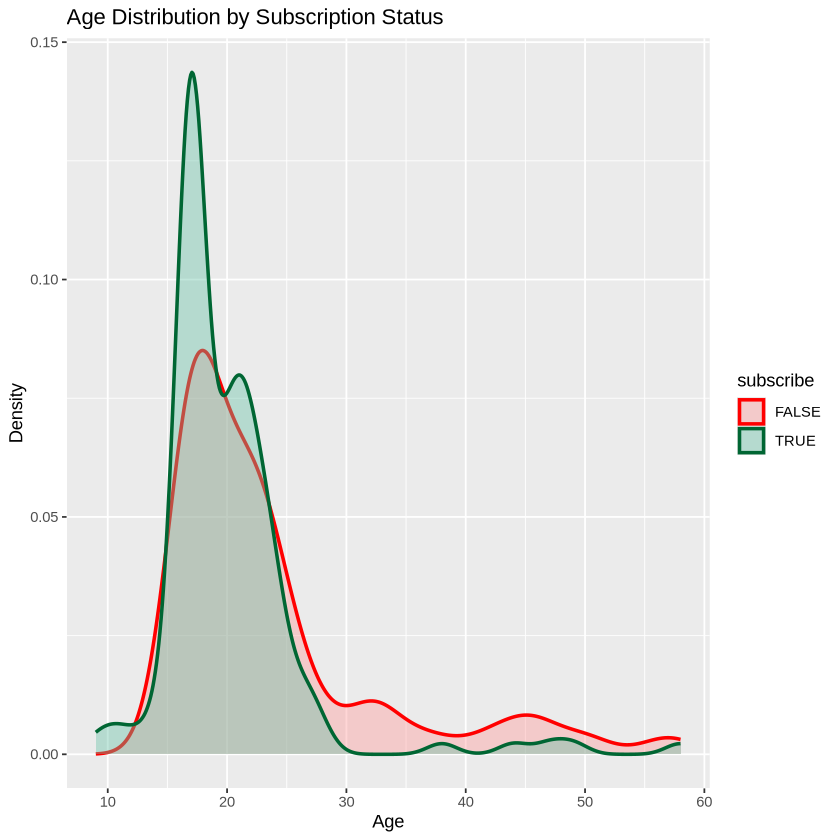

In [10]:
ggplot(data_combined, aes(x = Age, fill = subscribe, color = subscribe)) +
  geom_density(alpha = 0.4, size = 1) +  # semi-transparent fill and visible outline
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age",
    y = "Density"
  ) +
  scale_fill_manual(values = c("FALSE" = "#FF9999", "TRUE" = "#66C2A5")) +
  scale_color_manual(values = c("FALSE" = "#FF0000", "TRUE" = "#006633")) 

This density plot complements earlier findings that moderately experienced players (like Regulars) are the most likely to subscribe. In addition to this, younger players around the 20s range are more likely to subscribe, which supports that age is a strong indicator of newseltter engagement. 
The density plot comparing age distributions by subscription status shows a sharp peak in subscriber density around age 18, with a higher curve than non-subscribers. This demonstrates that subscription likelihood is highest among late teens, and it goes down with age. While both groups peak at the same age, the steeper curve for subscribers suggests that younger players are more engaged with game-related content. 

This aligns with previous insights from the experience-level analysis, where Regular players had the highest subscription proportion (≈80.6%), followed by Beginners (≈77.1%), and Veterans had the lowest (≈68.8%). The combination of age and experience reveals that subscription behavior is strongest among younger, moderately experienced players, who are likely still exploring the game and seeking updates or guidance. In contrast, older or highly experienced players may rely on alternative sources or feel less need for newsletters. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


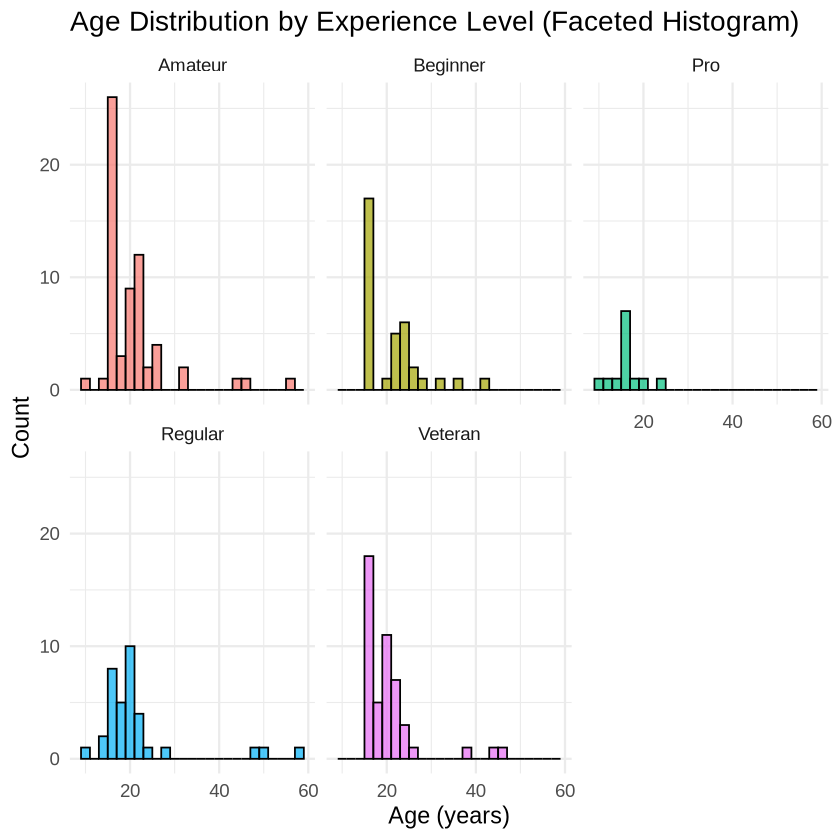

In [12]:
ggplot(data_combined, aes(x = Age, fill = experience)) +
  geom_histogram(binwidth = 2, alpha = 0.7, color = "black") +
  facet_wrap(~experience) +
  labs(title = "Age Distribution by Experience Level (Faceted Histogram)",
       x = "Age (years)",
       y = "Count") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")


The faceted histogram above shows the age distribution by experience levels, which reveals that younger plays dominate across all experience categories, but specifically among Beginners, Amateurs, and Regulars, and most of the graphs are heavily skewed to the left. Most players in these groups are concentrated between ages 15 and 25, with most young people in the Regular group, aligning with earlier findings that most regular players are more likely to subscribe to a newsletter and . Interestingly, even Pro and Veteran players show a strong representation in the younger age range, which shows that age and experience are not strictly correlated, and younger players are still highly experienced.   